In [1]:
# SETTINGS

number_topics = 15

# Filter

Here we assume that the source file already contains the text, as it's a subcorpus.

In [2]:
# Filter the input file
import pandas as pd

df = pd.read_csv('00 source data (urls).csv')
df.fillna('', inplace=True)

# /!\ FILTERING
df = df[df['area'] == 'greenland']

df.to_csv("01 data filtered.csv", index = False, encoding='utf-8')

df

,result #,search engine,discourse,area,domain,actor name,article title,article url,article description,total nr of results (best guess),...,canonical_url,title,description,raw_content,comments,author,categories,tags,date,sitename
629,1002,bing,environment,greenland,au,,Environmental Science - Aarhus Universitet,https://phd.tech.au.dk/programmes/environmenta...,Environmental Science is a leading partner in ...,5480000,...,,Environmental Science,Information about the PhD programme when doing...,Environmental science provides an integrated i...,,Revised,,,2021-04-07,Aarhus University
637,1001,bing,environment,greenland,conserve-energy-future,,What is Environmental Health and Critical Issu...,https://www.conserve-energy-future.com/environ...,What is Environmental Health? Environmental he...,5480000,...,https://www.conserve-energy-future.com/environ...,What is Environmental Health and Critical Issu...,Environmental health entails grasping the effe...,What is Environmental Health?\nEnvironmental h...,,About Rinkesh,Energy Articles,biological hazards|climate change|droughts|eco...,2014-08-29,Conserve Energy Future
638,1017,bing,environment,greenland,europa,,Arctic - International Issues - Environment - ...,https://ec.europa.eu/environment/international...,Continuation of these trends would have profou...,5480000,...,,Arctic,The EU participates in international efforts t...,Accessibility tools\nService tools\nLanguage s...,,,,environment|international|cooperation|arctic|f...,,International Issues - Environment - European ...
641,1008,bing,environment,greenland,sciencedaily,,Top Environment News -- ScienceDaily,https://www.sciencedaily.com/news/top/environm...,"3/26/2021 · Mar. 24, 2021 — A new study is the...",5480000,...,https://www.sciencedaily.com/news/top/environm...,Top Environment News,Top stories featured on ScienceDaily's Plants ...,"Apr. 23, 2021 Researchers offer conclusive res...",,,,environment|biological science,2021-04-26,ScienceDaily
644,1011,bing,environment,greenland,wsp,,Environmental Services | WSP,https://www.wsp.com/en-GL/sectors/environment,,5480000,...,https://www.wsp.com/en-GL/sectors/environment,Future-Ready Environmental Services,WSP's environmental experts help clients ident...,While every human activity and development exe...,,,,,,WSPNZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1283,bing,Climate change,greenland,un,,United Nations Treaty Collection,https://treaties.un.org/,The Treaty Section of the Office of Legal Affa...,23600000,...,,United Nations Treaty Collection,This is the United Nations Treaty Collection h...,Copies of instruments and other relevant notif...,,,,treaty law|international law|registration and ...,2020-12-03,
1000,1296,bing,Climate change,greenland,un,,UNdata,http://data.un.org/,"Popular statistical tables, country (area) and...",23600000,...,,\r\n\t\r\n UNdata\r\n,UNdata is an internet-based data service which...,32\ndatabases - 60 million records\nPopular st...,,,,UNdata|UNSD|statistics|data|search engine,,
1104,1042,bing,environment,greenland,3m,,"Environmental Monitoring: Food Safety, Food Sa...",https://www.3m.com/3M/en_US/food-safety-us/res...,Effective environmental monitoring programs ca...,5480000,...,,,,,,,,,,
1195,1320,bing,green growth,greenland,tesla,,"Electric Cars, Solar & Clean Energy | Tesla",https://www.tesla.com/,"Tesla is accelerating the world""s transition t...",6400000,...,,,,,,,,,,


# Group content by actor

In [3]:
actor_dict = {}
for index, row in df.iterrows():
    if row['actor name']:
        actor_id = row['actor name']
    else:
        actor_id = row['domain']
    if actor_id in actor_dict:
        actor_obj = actor_dict[actor_id]
    else:
        actor_obj = {}
        actor_obj['Id'] = actor_id
        actor_obj['urls'] = ''
        actor_obj['text'] = ''
        actor_obj['discourse: Climate change'] = 'False'
        actor_obj['discourse: Environment'] = 'False'
        actor_obj['discourse: Green growth'] = 'False'
        actor_obj['discourse: Sustainability'] = 'False'
        actor_obj['discourse: UN SDGs'] = 'False'
        actor_obj['area: Arctic'] = 'False'
        actor_obj['area: Arctic Norway'] = 'False'
        actor_obj['area: Extended Arctic'] = 'False'
        actor_obj['area: Faroed Islands'] = 'False'
        actor_obj['area: Greenland'] = 'False'
        actor_obj['area: Iceland'] = 'False'
        actor_obj['area: Nunavut'] = 'False'
        actor_obj['area: Sami'] = 'False'
    
    actor_obj['urls'] = actor_obj['urls'] + str(row['article url']) + ' '
    actor_obj['text'] = actor_obj['text'] + str(row['raw_content']) + ' . '

    if row['discourse'] == 'Climate change':
        actor_obj['discourse: Climate change'] = 'True'
    if row['discourse'] == 'environment':
        actor_obj['discourse: Environment'] = 'True'
    if row['discourse'] == 'green growth':
        actor_obj['discourse: Green growth'] = 'True'
    if row['discourse'] == 'sustainability':
        actor_obj['discourse: Sustainability'] = 'True'
    if row['discourse'] == 'UN SDGs':
        actor_obj['discourse: UN SDGs'] = 'True'
    if row['area'] == 'arctic':
        actor_obj['area: Arctic'] = 'True'
    if row['area'] == 'arctic norway':
        actor_obj['area: Arctic Norway'] = 'True'
    if row['area'] == 'extended arctic':
        actor_obj['area: Extended Arctic'] = 'True'
    if row['area'] == 'faroe islands':
        actor_obj['area: Faroed Islands'] = 'True'
    if row['area'] == 'greenland':
        actor_obj['area: Greenland'] = 'True'
    if row['area'] == 'Iceland':
        actor_obj['area: Iceland'] = 'True'
    if row['area'] == 'Nunavut':
        actor_obj['area: Nunavut'] = 'True'
    if row['area'] == 'Sami':
        actor_obj['area: Sami'] = 'True'
    
    actor_dict[actor_id] = actor_obj
print("Actor index built.")

Actor index built.


In [4]:
# DOWNLOAD ACTORS
actors_df = pd.DataFrame.from_dict(actor_dict, orient='index')
actors_df.to_csv("02 Actors with text.csv", index = False, encoding='utf-8')
actors_df

,Id,urls,text,discourse: Climate change,discourse: Environment,discourse: Green growth,discourse: Sustainability,discourse: UN SDGs,area: Arctic,area: Arctic Norway,area: Extended Arctic,area: Faroed Islands,area: Greenland,area: Iceland,area: Nunavut,area: Sami
au,au,https://phd.tech.au.dk/programmes/environmenta...,Environmental science provides an integrated i...,False,True,False,False,False,False,False,False,False,True,False,False,False
conserve-energy-future,conserve-energy-future,https://www.conserve-energy-future.com/environ...,What is Environmental Health?\nEnvironmental h...,False,True,False,False,False,False,False,False,False,True,False,False,False
europa,europa,https://ec.europa.eu/environment/international...,Accessibility tools\nService tools\nLanguage s...,False,True,False,False,False,False,False,False,False,True,False,False,False
sciencedaily,sciencedaily,https://www.sciencedaily.com/news/top/environm...,"Apr. 23, 2021 Researchers offer conclusive res...",False,True,False,False,False,False,False,False,False,True,False,False,False
wsp,wsp,https://www.wsp.com/en-GL/sectors/environment ...,While every human activity and development exe...,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vanguardlogistics,vanguardlogistics,http://vanguardlogistics.com/,Find a Service\nManage a Shipment\nOur Locatio...,False,False,True,False,False,False,False,False,False,True,False,False,False
ramboll,ramboll,https://uk.ramboll.com/,"As an industry, we need to address the climate...",False,False,False,True,False,False,False,False,False,True,False,False,False
un,un,https://unstats.un.org/unsd/envstats/clinks.cs...,|Albania\n||National Environmental Agency\n|\n...,True,True,False,False,False,False,False,False,False,True,False,False,False
3m,3m,https://www.3m.com/3M/en_US/food-safety-us/res...,.,False,True,False,False,False,False,False,False,False,True,False,False,False


# LDA: extract topics

In [5]:
import pandas as pd
# This is for text mining
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# Source file (CSV)
source_file = "02 Actors with text.csv"
text_col_name = "text"

# More features is more dimensions for each document. You should probably keep it at 1000.
no_features = 1000

In [7]:
# LOAD DATA
documents_dictionary = {}
df = pd.read_csv(source_file)

for index, row in df.iterrows():
    key = row['Id']
    text = str(row[text_col_name])
    if len(text)>10:
        documents_dictionary[key] = text

In [8]:
# COMPUTE LDA TOPICS
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents_dictionary.values())
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=number_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print("LDA topics computed.")

LDA topics computed.


In [9]:
# DISPLAY RESULTS (for monitoring)
no_top_words = 25 # How many words to keep for each topic (there may be many)

# Create a data frame for convenience (for download, actually)
topics_df = pd.DataFrame(columns=['topic','word','weight'])

# Display topics to check it works. For each topic, we only display the top words.
i = 0
for topic_idx, topic in enumerate(lda.components_):
    print("# TOPIC_%d:" % (topic_idx))
    for j in topic.argsort()[:-no_top_words - 1:-1]:
        print(str(topic[j]) + "   " + tf_feature_names[j])
        topics_df.loc[i] = ["TOPIC_"+str(topic_idx), tf_feature_names[j], topic[j]]
        i = i+1
    print(" ")

topics_df

# TOPIC_0:
6.168409782859306   new
6.015609204265705   period
4.856677569772922   america
4.770230742230311   north
4.46023526031344   south
3.818675751178368   performance
3.4559584420009477   australia
3.3372065598684717   time
3.1289782136982622   level
3.097489910648932   earth
2.998603868663224   late
2.702977498917908   marine
2.6464822761520455   today
2.519615176689888   ocean
2.50620512836853   possible
2.458594759304473   land
2.4227338733896344   antarctica
2.396882660612943   products
2.3522039128138426   sea
2.333460676806298   high
2.333081877184083   western
2.3226822239910208   africa
2.3135815240034567   continue
2.2742885001746345   demand
2.210587911075031   date
 
# TOPIC_1:
134.09952641586176   emissions
123.02967600630498   ranked
84.72203282970197   water
59.46857679589258   pollution
57.296475684127344   united
49.15740604014408   canada
47.68853511777774   co2
47.21786587930211   total
45.5246814112239   population
35.84865649547773   organic
33.30157041508181 

,topic,word,weight
0,TOPIC_0,new,6.168410
1,TOPIC_0,period,6.015609
2,TOPIC_0,america,4.856678
3,TOPIC_0,north,4.770231
4,TOPIC_0,south,4.460235
...,...,...,...
370,TOPIC_14,human,1.981566
371,TOPIC_14,future,1.874721
372,TOPIC_14,change,1.868197
373,TOPIC_14,water,1.852486


In [10]:
# COMPUTE DOC x TOPIC RELATIONS (network)
# We create a data frame to store the content. It looks like a matrix.
df_matrix_style = pd.DataFrame(columns=['doc']+[("TOPIC_"+str(i)) for i in range(0,number_topics)])

# We create a second data frame with the same data. It looks like a list.
# Depending on what you want to do, one or the other are most convenient.
df_list_style = pd.DataFrame(columns=['doc', 'topic', 'weight'])

doc_topic = lda.transform(tf)
docs = list(documents_dictionary.keys())
topic_index = {}
i1 = 0
i2 = 0
for j in range(len(docs)):
    key = docs[j]
    topic_weights = list(doc_topic[j])
    
    # Index
    topic_index[key] = topic_weights
    
    # Matrix style
    df_matrix_style.loc[i1] = [key]+topic_weights
    i1 = i1+1
    
    # List style
    for k, w in enumerate(topic_weights):
        df_list_style.loc[i2] = [key, "TOPIC_"+str(k), w]
        i2 = i2+1

print("Done.")

Done.


In [11]:
# Output articles & topics, matrix style, to check that it works:
df_matrix_style

,doc,TOPIC_0,TOPIC_1,TOPIC_2,TOPIC_3,TOPIC_4,TOPIC_5,TOPIC_6,TOPIC_7,TOPIC_8,TOPIC_9,TOPIC_10,TOPIC_11,TOPIC_12,TOPIC_13,TOPIC_14
0,au,0.000158,0.000158,0.000158,0.000158,0.000158,0.109466,0.000158,0.000158,0.000158,0.000158,0.000158,0.888476,0.000158,0.000158,0.000158
1,conserve-energy-future,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.998865,0.000081,0.000081,0.000081
2,europa,0.000071,0.000071,0.000071,0.000071,0.000071,0.179208,0.000071,0.000071,0.000071,0.784867,0.000071,0.035068,0.000071,0.000071,0.000071
3,sciencedaily,0.000333,0.000333,0.995333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333
4,wsp,0.000240,0.000240,0.000240,0.000240,0.000240,0.883583,0.000240,0.000240,0.000240,0.000240,0.000240,0.113299,0.000240,0.000240,0.000240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,nunatsiaq,0.002083,0.002083,0.002083,0.002083,0.002083,0.802568,0.002083,0.002083,0.002083,0.002083,0.002083,0.170348,0.002083,0.002083,0.002083
109,intrafish,0.766666,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667
110,vanguardlogistics,0.000351,0.000351,0.000351,0.000351,0.000351,0.000351,0.000351,0.000351,0.000351,0.000351,0.995088,0.000351,0.000351,0.000351,0.000351
111,ramboll,0.000433,0.000433,0.000433,0.000433,0.000433,0.993939,0.000433,0.000433,0.000433,0.000433,0.000433,0.000433,0.000433,0.000433,0.000433


In [12]:
# Output articles & topics, list style, to check that it works:
df_list_style

,doc,topic,weight
0,au,TOPIC_0,0.000158
1,au,TOPIC_1,0.000158
2,au,TOPIC_2,0.000158
3,au,TOPIC_3,0.000158
4,au,TOPIC_4,0.000158
...,...,...,...
1690,un,TOPIC_10,0.000030
1691,un,TOPIC_11,0.000030
1692,un,TOPIC_12,0.000030
1693,un,TOPIC_13,0.000030


In [13]:
# DOWNLOAD LDA results
# Note: these files can be used in Tableau or Table2Net to build various visualizations.

topics_df.to_csv("03-a LDA topics and their words.csv", index = False, encoding='utf-8')
# df_matrix_style.to_csv("03-? LDA actors and topics matrix.csv", index = False, encoding='utf-8')
df_list_style.to_csv("03-b LDA actors and topics list style.csv", index = False, encoding='utf-8')

In [14]:
# ENRICH FILE (and monitor new version)
for topic_id, topic in enumerate(lda.components_):
    colname = "topic_"+str(topic_id)
    values = []
    for index, row in df.iterrows():
        key = row['Id']
        if key in topic_index:
            val = topic_index[key][topic_id]
        else:
            val = 0
        values.append(val)
    df.insert(len(df.columns), colname, values)
df

,Id,urls,text,discourse: Climate change,discourse: Environment,discourse: Green growth,discourse: Sustainability,discourse: UN SDGs,area: Arctic,area: Arctic Norway,...,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,au,https://phd.tech.au.dk/programmes/environmenta...,Environmental science provides an integrated i...,False,True,False,False,False,False,False,...,0.109466,0.000158,0.000158,0.000158,0.000158,0.000158,0.888476,0.000158,0.000158,0.000158
1,conserve-energy-future,https://www.conserve-energy-future.com/environ...,What is Environmental Health?\nEnvironmental h...,False,True,False,False,False,False,False,...,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.998865,0.000081,0.000081,0.000081
2,europa,https://ec.europa.eu/environment/international...,Accessibility tools\nService tools\nLanguage s...,False,True,False,False,False,False,False,...,0.179208,0.000071,0.000071,0.000071,0.784867,0.000071,0.035068,0.000071,0.000071,0.000071
3,sciencedaily,https://www.sciencedaily.com/news/top/environm...,"Apr. 23, 2021 Researchers offer conclusive res...",False,True,False,False,False,False,False,...,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333,0.000333
4,wsp,https://www.wsp.com/en-GL/sectors/environment ...,While every human activity and development exe...,False,True,False,False,False,False,False,...,0.883583,0.000240,0.000240,0.000240,0.000240,0.000240,0.113299,0.000240,0.000240,0.000240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,vanguardlogistics,http://vanguardlogistics.com/,Find a Service\nManage a Shipment\nOur Locatio...,False,False,True,False,False,False,False,...,0.000351,0.000351,0.000351,0.000351,0.000351,0.995088,0.000351,0.000351,0.000351,0.000351
133,ramboll,https://uk.ramboll.com/,"As an industry, we need to address the climate...",False,False,False,True,False,False,False,...,0.993939,0.000433,0.000433,0.000433,0.000433,0.000433,0.000433,0.000433,0.000433,0.000433
134,un,https://unstats.un.org/unsd/envstats/clinks.cs...,|Albania\n||National Environmental Agency\n|\n...,True,True,False,False,False,False,False,...,0.999577,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030
135,3m,https://www.3m.com/3M/en_US/food-safety-us/res...,.,False,True,False,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# DOWNLOAD ENRICHED FILE
df.drop(columns=[text_col_name]).to_csv("04 Actors and their topics.csv", index=False)

# Export LDA networks

In [16]:
# Export network of words and topics
import networkx as nx
G = nx.Graph()
for index, row in topics_df.iterrows():
    topic = 'T_'+str(row['topic'])
    word = 'W_'+str(row['word'])
    w = row['weight']
    
    G.add_edge(topic, word)
    G[topic][word]['weight'] = w
    
    G.nodes[topic]['label'] = str(row['topic'])
    G.nodes[topic]['type'] = 'topic'
    G.nodes[word]['label'] = str(row['word'])
    G.nodes[word]['type'] = 'word'
    
nx.write_gexf(G, "05 Words and topics.gexf")

In [17]:
# Export network of actors and topics
import networkx as nx
threshold = 0.001
G = nx.Graph()
for index, row in df_list_style.iterrows():
    topic = 'T_'+str(row['topic'])
    actor = 'A_'+str(row['doc'])
    w = row['weight']
    
    if w > threshold:
        G.add_edge(topic, actor)
        G[topic][actor]['weight'] = w

        G.nodes[topic]['label'] = str(row['topic'])
        G.nodes[topic]['type'] = 'topic'
        G.nodes[actor]['label'] = str(row['doc'])
        G.nodes[actor]['type'] = 'actor'
    
nx.write_gexf(G, "06 Actors and topics.gexf")

# UMAP after the topics

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import umap

In [19]:
# Load data
df = pd.read_csv("04 Actors and their topics.csv")
df = df.dropna()

In [20]:
# Prepare data
reducer = umap.UMAP()
umap_data = df[
    [
        "topic_0",
        "topic_1",
        "topic_2",
        "topic_3",
        "topic_4",
        "topic_5",
        "topic_6",
        "topic_7",
        "topic_8",
        "topic_9",
        "topic_10",
        "topic_11",
        "topic_12",
        "topic_13",
        "topic_14"
    ]
].values
scaled_umap_data = StandardScaler().fit_transform(umap_data)

In [21]:
# Compute embedding
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(137, 2)

Text(0.5, 1.0, 'UMAP projection of the dataset')

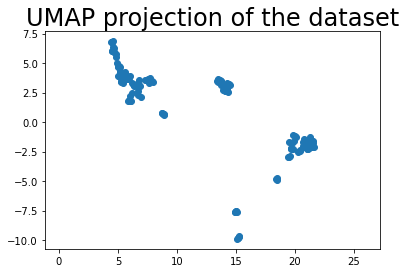

In [22]:
# Monitor embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [23]:
# Enrich source and download
xvalues = []
yvalues = []
for index, row in df.iterrows():
    coord = embedding[index]
    xvalues.append(coord[0])
    yvalues.append(coord[1])
df.insert(len(df.columns), 'X-UMAP', xvalues)
df.insert(len(df.columns), 'Y-UMAP', yvalues)

df.to_csv("07 Actors with topics + UMAP layout.csv", index = False, encoding='utf-8')